In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing


%matplotlib inline

# 
## Helper Functions

In [2]:
def get_optimal_epsilon(dataframe):
    nearest_neighbors = NearestNeighbors(n_neighbors=11)
    neighbors = nearest_neighbors.fit(dataframe)
    distances, indices = neighbors.kneighbors(dataframe)
    distances = np.sort(distances[:,10], axis=0)
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    return(distances[knee.knee])

In [3]:
def get_k_kmeans(dataframe):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(dataframe)        
    visualizer.show()

In [4]:
def get_k_agglomerative(dataframe):
    model = AgglomerativeClustering()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(dataframe)        
    visualizer.show()


## Clustering Functions

In [5]:
def DBSCAN_clustering(dataframe,epsilon,min_samples):
   
    clustering = DBSCAN(eps=epsilon, min_samples=min_samples).fit(dataframe)
    dataframe["dbs"] = clustering.labels_
    labels =dataframe["dbs"]
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    silhouetteScore = silhouette_score(dataframe, labels)
#     print("Estimated number of clusters: %d" % n_clusters_)
#     print("Estimated number of noise points: %d" % n_noise_)
#     print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, labels))
    return n_clusters_, n_noise_, silhouetteScore

In [6]:
def KMeans_clustering(dataframe,n_clusters):
    kmeans = KMeans(n_clusters = n_clusters).fit(dataframe)
    dataframe["kmeans"] = kmeans.labels_
    silhouetteScore = silhouette_score(dataframe, dataframe["kmeans"])
#     print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, dataframe["kmeans"]))
    return silhouetteScore  

In [7]:
def Agglomerative_clustering(dataframe,n_clusters):
    clustering = AgglomerativeClustering(n_clusters= n_clusters).fit(dataframe)
    dataframe["hac"]  = clustering.labels_
    silhouetteScore = silhouette_score(dataframe, dataframe["hac"] )
#     print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, dataframe["hac"] ))
    return silhouetteScore  

In [8]:
def GaussianMixtures_clustering(dataframe,n_components):
    gm = GaussianMixture(n_components = n_components).fit(dataframe)
    dataframe["gm"] = gm.predict(dataframe)  
    silhouetteScore = silhouette_score(dataframe, dataframe["gm"] )
    
#     print("Silhouette Coefficient: %0.3f" % silhouette_score(dataframe, dataframe["gm"]))
    return silhouetteScore  


## PCA Function

In [9]:
def pca_component(dataframe,n_components):
    pca = PCA(n_components = n_components)
    PCA_transformed_data = pca.fit_transform(dataframe)
    PCA_df = pd.DataFrame(data = PCA_transformed_data)
    return PCA_df

## 
## Exploring

In [10]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
df.shape

(8950, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


array([[<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>]], dtype=object)

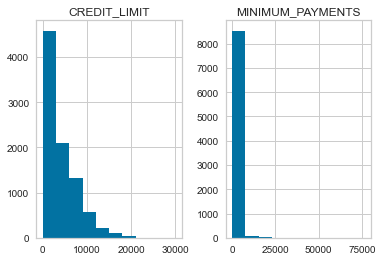

In [14]:
df.hist(['CREDIT_LIMIT','MINIMUM_PAYMENTS'])

<AxesSubplot:>

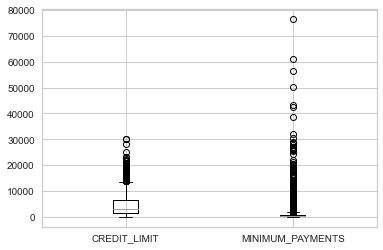

In [15]:
df.boxplot(['CREDIT_LIMIT','MINIMUM_PAYMENTS'])

## 
## Preprocessing

In [16]:
df_copy = df.copy()
column = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']
df_copy[column] = df_copy[column].fillna(df_copy[column].median())

In [17]:
df_copy.drop('CUST_ID', inplace=True, axis=1)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## 
## Normalize the data

In [19]:
df_normalized = pd.DataFrame(preprocessing.normalize(df_copy))
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.208886,0.000080,0.187872,0.187872,0.00000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939987,0.000000,0.039147,0.00000,0.001504
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


## 
## Choosing # of components graphically

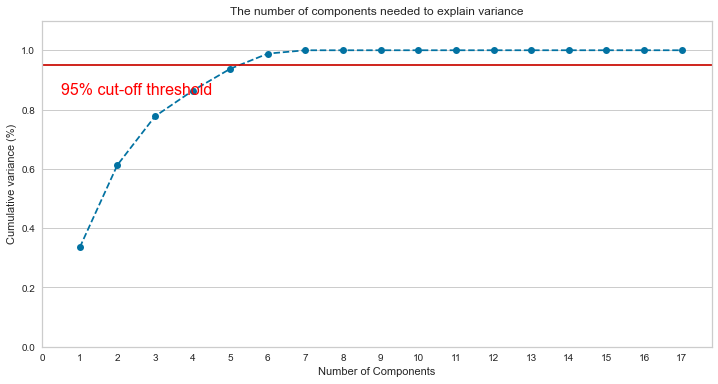

In [20]:
pca = PCA().fit(df_normalized)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## 
## Choosing # of components manually

In [21]:
silhouettes = []
for i in range(3,len(df_normalized.columns)):
    PCA_df = pca_component(df_normalized,i)
    silhouetteScore = DBSCAN_clustering(PCA_df,0.15,20)
    silhouettes.append(silhouetteScore)
    
for i in range(len(silhouettes)):
    print("# of components:", i+3 , "silhouetteScore: ", silhouettes[i])

# of components: 3 silhouetteScore:  (2, 3, 0.5716000126691505)
# of components: 4 silhouetteScore:  (2, 183, 0.5346633490476393)
# of components: 5 silhouetteScore:  (3, 561, 0.527040055768746)
# of components: 6 silhouetteScore:  (3, 996, 0.5159494997350991)
# of components: 7 silhouetteScore:  (3, 1100, 0.5151481339642243)
# of components: 8 silhouetteScore:  (3, 1101, 0.5151674832956061)
# of components: 9 silhouetteScore:  (3, 1103, 0.5152009933915316)
# of components: 10 silhouetteScore:  (3, 1104, 0.5152261739627668)
# of components: 11 silhouetteScore:  (3, 1107, 0.5152108489631235)
# of components: 12 silhouetteScore:  (3, 1107, 0.5152108189209716)
# of components: 13 silhouetteScore:  (3, 1107, 0.5152108066144825)
# of components: 14 silhouetteScore:  (3, 1107, 0.5152107941134902)
# of components: 15 silhouetteScore:  (3, 1107, 0.5152107904957632)
# of components: 16 silhouetteScore:  (3, 1107, 0.5152107896992969)


### 
## 1) Applying pca with # of components = 3

In [22]:
PCA_df = pca_component(df_normalized,3)

In [23]:
epsilon = get_optimal_epsilon(PCA_df)
epsilon

0.0753779437365332

In [24]:
n_clusters_pca3, n_noise_pca3, dbscan_ss_pca3  = DBSCAN_clustering(PCA_df, epsilon=0.07, min_samples=10)
print("PCA with 3 components\n")

print("Estimated number of clusters: %d" % n_clusters_pca3)
print("Estimated number of noise points: %d" % n_noise_pca3)
print("DBSCAN Silhouette Coefficient: %0.3f" % dbscan_ss_pca3)

PCA with 3 components

Estimated number of clusters: 9
Estimated number of noise points: 502
DBSCAN Silhouette Coefficient: 0.557


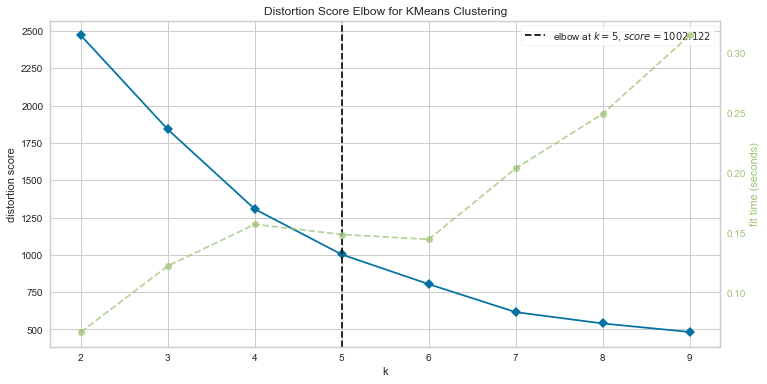

In [25]:
get_k_kmeans(PCA_df)

In [26]:
kmeans_ss_pca3 = KMeans_clustering(PCA_df, 5)
print("Kmeans Silhouette Coefficient: %0.3f" % kmeans_ss_pca3)

Kmeans Silhouette Coefficient: 0.782


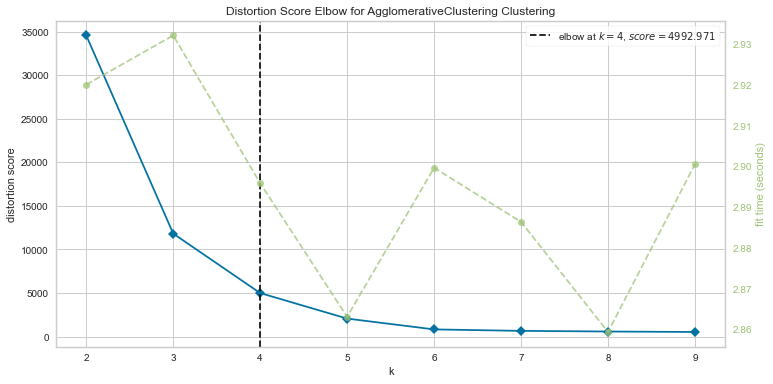

In [42]:
get_k_agglomerative(PCA_df)

In [43]:
hac_ss_pca3 = Agglomerative_clustering(PCA_df, 4)
print("Agglomerative Silhouette Coefficient: %0.3f" % hac_ss_pca3)

Agglomerative Silhouette Coefficient: 0.846


In [29]:
gmm_ss_pca3 = GaussianMixtures_clustering(PCA_df, n_components = 6)
print("Gaussian Mixture Silhouette Coefficient: %0.3f" % gmm_ss_pca3)

Gaussian Mixture Silhouette Coefficient: 0.900


In [44]:
print("Silhouette Score For DBSCAN : %0.3f" % dbscan_ss_pca3)
print("Silhouette Score For Kmeans : %0.3f" % kmeans_ss_pca3)
print("Silhouette Score For Hierarchical Agglomerative : %0.3f" % hac_ss_pca3)
print("Silhouette Score For Gaussian Mixtures : %0.3f" % gmm_ss_pca3)

Silhouette Score For DBSCAN : 0.557
Silhouette Score For Kmeans : 0.782
Silhouette Score For Hierarchical Agglomerative : 0.846
Silhouette Score For Gaussian Mixtures : 0.900


### 
## 2) Applying pca with # of components = 6

In [31]:
PCA_df6 = pca_component(df_normalized,6)

In [32]:
epsilon = get_optimal_epsilon(PCA_df6)
epsilon

0.15072711115926973

In [33]:
n_clusters_pca6, n_noise_pca6, dbscan_ss_pca6  = DBSCAN_clustering(PCA_df6, epsilon=0.15, min_samples=20)
print("PCA with 6 components\n")

print("Estimated number of clusters: %d" % n_clusters_pca6)
print("Estimated number of noise points: %d" % n_noise_pca6)
print("DBSCAN Silhouette Coefficient: %0.3f" % dbscan_ss_pca6)

PCA with 6 components

Estimated number of clusters: 3
Estimated number of noise points: 996
DBSCAN Silhouette Coefficient: 0.516


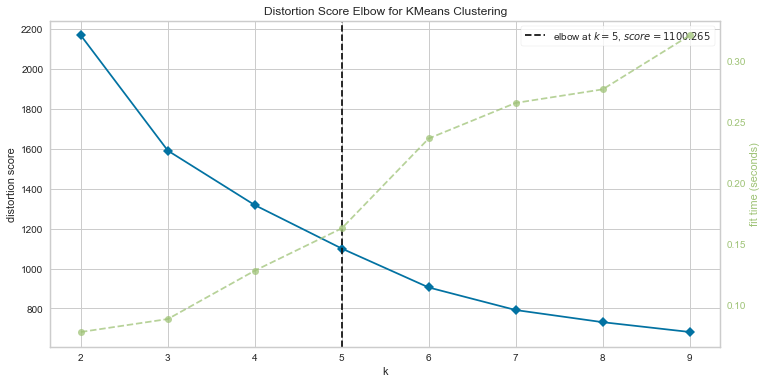

In [34]:
get_k_kmeans(PCA_df6)

In [35]:
kmeans_ss_pca6 = KMeans_clustering(PCA_df6, 5)
print("Kmeans Silhouette Coefficient: %0.3f" % kmeans_ss_pca6)

Kmeans Silhouette Coefficient: 0.685


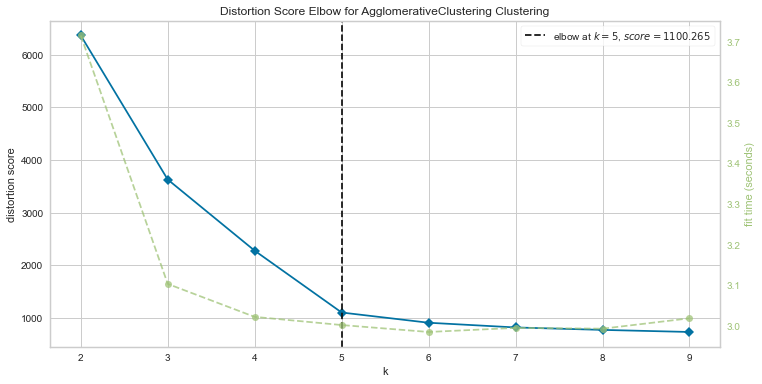

In [36]:
get_k_agglomerative(PCA_df6)

In [37]:
hac_ss_pca6 = Agglomerative_clustering(PCA_df6, 5)
print("Agglomerative Silhouette Coefficient: %0.3f" % hac_ss_pca6)

Agglomerative Silhouette Coefficient: 0.823


In [38]:
gmm_ss_pca6 = GaussianMixtures_clustering(PCA_df6, n_components = 5)
print("Gaussian Mixture Silhouette Coefficient: %0.3f" % gmm_ss_pca6)

Gaussian Mixture Silhouette Coefficient: 0.861


In [39]:
print("Silhouette Score For DBSCAN : %0.3f" % dbscan_ss_pca6)
print("Silhouette Score For Kmeans : %0.3f" % kmeans_ss_pca6)
print("Silhouette Score For Hierarchical Agglomerative : %0.3f" % hac_ss_pca6)
print("Silhouette Score For Gaussian Mixtures : %0.3f" % gmm_ss_pca6)

Silhouette Score For DBSCAN : 0.516
Silhouette Score For Kmeans : 0.685
Silhouette Score For Hierarchical Agglomerative : 0.823
Silhouette Score For Gaussian Mixtures : 0.861
